
 <font size="10">**Factors that Effect Heart Disease Cleveland**</font> 
    
#### Sonja Deng


### Introduction


Heart disease is a complex medical ailment that mostly affects the circulatory system. It includes a range of conditions such as arrhythmias, heart failure, and coronary artery disease. These disorders provide a serious risk to general health since they can cause severe illnesses like heart attacks, strokes, and angina (chest discomfort). Heart disease risk factors include genetic susceptibility, certain medical problems, and lifestyle decisions. Appropriate diagnosis and prompt treatment are essential to preventing its potentially dangerous outcomes and maintaining heart health. We decided to embark on understanding on doing data analysis on this topic because of how relevant our health is and how we can help others prevent being diagnosed with heart disease by considering various health factors. 

The goal of the project is to understand what are the most likely causes of heart disease as well as how geographically these factors may differ.

Our predictive question is:

<font size="3">**Is the Cleveland population likely to have heart disease, based on the variables age, resting blood pressure (trestbps), cholesterol levels (chol), maximum heart rate (thalach) and ST depression induced by exercise relative to rest (oldpeak)?**<font>

The dataset we are going to be using is from University UC Irvine and includes 4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach. 

Here is the total set of variables in our dataset including their descriptors: 
    
1. **Age** -  age
2. **Sex** - sex (1 = male, 0 = female)
3. **Cp** - chest pain type
4. **Trestbps** - resting blood pressure in mmHg
5. **Chol** - serum cholestoral in mg/dl
6. **Fbs** - fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)
7. **Restecg** - resting electrocardiographic results
8. **Thalach** - maximum heart rate achieved
9. **Exang** - whether exercise induced angina (1 = True, 0 = False)
10. **Oldpeak** - ST depression induced by exercise, relative to rest. If this value is greater than 1 it means that it is a significant issue and serious
11. **Slope** - the slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. **Ca** - number of major vessels (0-3) coloured by flourosopy
13. **Thal** - (3 = normal, 6 = fixed defect, 7 = reversable defect)
14. **Num** - diagnosis of heart disease (1,2,3,4 = presence, 0 = no presence)


More information about these variables can be found in the database’s description box.
earch relevance and impact.



The 5 variables we decided to use were: `age`, `trestbps` which is resting blood pressure, `chol` which are cholesterol levels, `thalach` which is the maximum heart rate, and `oldpeak` which is the ST depression induced by exercise relative to rest. We chose these 5 variables to plot on the x-axis because we believe they would have the most impact when it came to determining and affecting heart disease in a patient. This was based on various research we did online about the factors that effect heart disease such as our variables. The sources that we found for each of our 5 variables can be found in our bibliography section at the end of this report.

1. **Age** - risk of heart disease increases with age, as older individuals are more likely to accumulate risk factors  ("Heart Health and Aging," National Institute on Aging, 2023)
2. **Resting blood pressure** - Elevated resting blood pressure, particularly when consistently high, is a significant risk factor for heart disease ("Elevated Blood Pressure," Mayo Clinic)
3. **Cholesterol levels** - high levels of cholesterol are significant risk factors for heart disease ("High Cholesterol," Mayo Clinic, 2023)  
4. **ST depression** - if greater than 1mm is considered as a risk factor for heart disease (Lim et al., 2016)
5. **Maximum heart rate** - increase in heart rate shown to be associated with great (Saruta & Palatini, 2005)

The databases we decided to use were the one from Cleveland and the one from VA Long Beach. These are the locations of two hospitals in the USA. We chose the following cities in USA with 2 different hospitals to get a representative picture of the problems associated with heart disease across a range of demographics, to pinpoint regional differences in disease prevalence and risk factors, and to support cooperative research, historical data analysis, and policy alignment for greater research relevance and impact.

### Methodology

#### Preprocessing and exploratory data analysis

1) Imported libraries.
2) Imported dataset from the online directory to get access to Cleveland dataset.

3) Data was cleaned and organized by giving the unidentified columns appropriate titles, eliminating superfluous variables, and eliminating overly assertive observations, and adding a new column `diagnosis`.

4) To conduct analysis, we divided our data into training and testing sets. We next computed summary statistics and used the training set to visualize the distribution of possible predictors. Utilizing the training set only in the last stages.

5) To forecast how we want our classifier to function, we summarized the training data by finding the min, mean, and max of our dataset.
6) Visualized the relationship between our 5 variables `age`, `trestbps`, `chol`, `thalach`, `oldpeak` and their diagnosis to gain a better comprehension of the distribution of the data using `geom_histogram` and `ggplot`.


#### Classification: Finding the best $k$ value

In pursuit of identifying the optimal value for $k$-nearest neighbours, which yields the highest accuracy in predictions, the following steps are undertaken in the provided code:

1) Utilize the `recipe` function to center and scale the data.

2) Execute cross-validation with ten folds on the training data, employing `vfold_cv`. This choice of ten folds is made to enhance accuracy by reducing dependency on the observations within a single validation set.

3) Develop a $k$-nearest neighbours model with `neighbours = tune()`instead of a fixed value, enabling the search for the most suitable $k$ value.

4) Add the recipe and model to a workflow, using `tune_grid` to fit. This workflow runs cross-validation on a range of $k$-nearest neighbours values that is specified in `gridvals`.

5) Find the best $k$ value by filtering for accuracy and plotting a line plot with the accuracy estimate on the y-axis and $k$ (neighbours) on the x-axis.

#### Testing our classifier

1) Crafted a new model specification based on the optimal $k$ value selected, combining it with the previously established recipe within a workflow. Subsequently, the classifier was fitted to our training set.

2) Used `predict` function on the testing set to evaluate the classifier's accuracy in predicting data it had not encountered before.


3) Generated a confusion matrix to gain insights into the classifier's precision concerning specific diagnoses and its potential implications in real-world applications.


4) Visualized our results for the Cleveland dataset by creating a graph of our confusion matrix and the precision of our diagnoses.


5) Examined the classifier's accuracy when presented with data from VA Long Beach, the other dataset from the USA. Visualized our results for the VA Long Beach dataset by creating a graph of our confusion matrix and the precision of our diagnoses.

### Preprocessing and exploratory data analysis

#### Loading libraries and formatting graphs

In [60]:
# importing libraries
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(forcats)
library(RColorBrewer)
library(ggplot2)
library(knitr)

# formatting graphs
options(repr.plot.width = 12, repr.plot.height = 6)

### Reading the Data

#### Importing the dataset

We read our dataset directly from the URL from the online directory and saved it to a dataframe called cleveland_data. Since the columns in the dataset have no headings, we set col_names to FALSE.

In [61]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",
                          col_names = FALSE)

head(cleveland_data)
nrow(cleveland_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1 X2 X3 X4  X5  X6 X7 X8  X9 X10 X11 X12 X13 X14
1 63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2 67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3 67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
4 37 1  3  130 250 0  0  187 0  3.5 3   0.0 3.0 0  
5 41 0  2  130 204 0  2  172 0  1.4 1   0.0 3.0 0  
6 56 1  2  120 236 0  0  178 0  0.8 1   0.0 3.0 0

[1] 303

*figure 1*

Column names are not included in the figure 1 dataframe. In order to make it obvious to readers of our data analysis what each column represents, we will be adding them as our next step in tidying up the data. The columns are currently either `<dbl>` or `<chr>`, which is another problem. To convert those to doubles, we will do as follows. 


#### Wrangling and Cleaning

Some columns have "?" for unknown values, which is why they are being read as `<chr>`. We will change those to `NA` so their columns can have the types we require. 

Additionally, since we are categorizing whether or not a patient has heart disease, we must add a true/false column based on `num`, which we will name `diagnosis`. In the real world, `diagnosis` would enable us to recommend a visit to the doctor regardless of the severity of the disease, as `num` classifies diseases according to their severity (0 being none). This is more helpful because all heart diseases require medical attention and potential treatment. We used `mutate` and `as_factor` to ensure that our response variable, `diagnosis`, is treated as a factor which is necessary for our classification model.

In [62]:
#setting seed so our data is reproducible
set.seed(1)

# assigning column names
cleveland_clean <- cleveland_data

colnames(cleveland_clean) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
                           
# changing "?" into NA
cleveland_clean[ cleveland_clean == "?" ] <- NA


# adding diagnosis column, setting column types
# as.double is being used to get rid of decimal points when switching to factor

cleveland_clean <- cleveland_clean |>
                    mutate(diagnosis = as.factor(ifelse(is.na(num), NA, (num > 0)))) |>
                     mutate(num = as_factor(num))  |>
                     mutate(age = as.double(age),
                           trestbps = as.double(trestbps),
                           oldpeak = as.double(oldpeak),
                           thalach = as.double(thalach), 
                           chol = as.double(chol)) |>
                    filter(age != "NA",
                           trestbps != "NA",
                           oldpeak != "NA",
                          chol != "NA",
                          thalach != "NA")

head(cleveland_clean)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal num
1 63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0  0  
2 67  1   4  160      286  0   2       108     1     1.5     2     3.0 3.0  2  
3 67  1   4  120      229  0   2       129     1     2.6     2     2.0 7.0  1  
4 37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0  0  
5 41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0  0  
6 56  1   2  120      236  0   0       178     0     0.8     1     0.0 3.0  0  
  diagnosis
1 FALSE    
2 TRUE     
3 TRUE     
4 FALSE    
5 FALSE    
6 FALSE

*figure 2*

The column `num` uses integers to distinguish presence (1,2,3,4) from absence (0), and we want to determine *whether or not* a patient has heart disease, a new boolean column `diagnosis` has been added to narrow diagnoses down to `TRUE` or `FALSE`. To be able to stratify by it, we made it a factor column.

#### Exploring the data

Considering, our dataset is now wrangled, clean, and tidy we can perform some basic data analysis to understand more about our dataset. First we are going to find the percentage and the amount of data points per condition whether that be `TRUE` or `FALSE`. We will be using the functions `group_by`, `summarize`, and `mutate` to perform that.

In [63]:
data_percentage <- cleveland_clean |>
    group_by(diagnosis) |>
    summarize(n=n()) |>
    mutate(percent = n*100/nrow(cleveland_clean))

data_percentage

diagnosis n   percent 
1 FALSE     164 54.12541
2 TRUE      139 45.87459

*figure 3*

We are trying to find out the percentage of our dataset that is `TRUE` or `FALSE`. We can see that 164 data points are `FALSE`, whereas 139 of the data points are `TRUE`, which means that they have heart disease. We can also see through using the functions `group_by`, `summarize`, and `mutate` we can find the percentage of each condition. The percentage of the 2 conditions are pretty equal. Although it seems that there are more data points for those that do not have heart disease.

#### Splitting our data into training and testing sets

This data must be divided into training and testing sets before we can begin working on our model. Stratifying based on `diagnosis` will be our method of prediction for the new column.

Because it shuffles our data for us and guarantees that a consistent percentage of each class is present in both, we will use the function `initial_split` to split our dataframe into 75% training and 25% testing. Keeping enough data for efficient testing afterwards, the 75-25 split gives us the opportunity to train our model on as many data points as possible.

In [64]:
#splitting dataframe into training, testing datasets
cleveland_split <- initial_split(cleveland_clean, prop = 3/4, strata = diagnosis)

cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)

head(cleveland_training)

nrow(cleveland_training)
nrow(cleveland_testing)

age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca  thal num
1 63  1   1  145      233  1   2       150     0     2.3     3     0.0 6.0  0  
2 37  1   3  130      250  0   0       187     0     3.5     3     0.0 3.0  0  
3 41  0   2  130      204  0   2       172     0     1.4     1     0.0 3.0  0  
4 57  1   4  140      192  0   0       148     0     0.4     2     0.0 6.0  0  
5 56  0   2  140      294  0   2       153     0     1.3     2     0.0 3.0  0  
6 57  1   3  150      168  0   0       174     0     1.6     1     0.0 3.0  0  
  diagnosis
1 FALSE    
2 FALSE    
3 FALSE    
4 FALSE    
5 FALSE    
6 FALSE

[1] 227

[1] 76

*figure 4*

In our preceding code segment, we employed the `initial_split` function to partition the dataset into a training set, where our model is constructed, and a testing set for, let's say, rigorous evaluation. This method of data division was chosen strategically. By utilizing `initial_split`, we introduced randomness through data shuffling, mitigating biases and removing any inherent order. Additionally, we employed stratification based on the `diagnosis` variable, ensuring an equitable distribution of each class across both sets.

The training set comprises 227 rows, constituting 75% of the data, while the testing set encompasses 76 rows, representing the remaining 25%. This allocation of data provides a substantial volume for training the classifier, equipping it with the ability to learn effectively. Simultaneously, the testing set offers a robust assessment ground, affirming the reliability of our classifier.

It's worth noting that henceforth, our focus will be exclusively on the training set, reserving the testing set for final evaluations. This approach is underpinned by the rationale that sustained engagement with the training data maximizes the model's learning potential.

### Summarizing the data

#### Find the Max and Min Values per Num


Before visualizing our data, we will look at the maximum and minimum values of our dataset. We will be using the functions `group_by` and `summarize` to perform this. The functions `max` and `min` help us to find the maximum and minimum values depending on the variables that we select. We have selected the 5 variables that we believe to affect the diagnosis of the patient.

In [65]:
#finding max and min values depending on the diagonsis for our variables 
max_cleveland_training<- cleveland_training |>
    group_by(diagnosis) |>
    summarize(max_age = max(age, na.rm = TRUE),
             max_trestbps = max(trestbps, na.rm = TRUE),
             max_chol = max(chol, na.rm = TRUE),
             max_oldpeak = max(oldpeak, na.rm = TRUE),
             max_thalach = max(thalach, na.rm = TRUE)) |>
             pivot_longer(cols = -diagnosis,
                 names_to = 'cleveland_max_',
                 values_to = 'Value') 
max_cleveland_training

min_cleveland_training<- cleveland_training |>
    group_by(diagnosis) |>
    summarize( min_age = min(age, na.rm = TRUE),
             min_trestbps = min(trestbps, na.rm = TRUE),
             min_chol = min(chol, na.rm = TRUE),
             min_oldpeak = min(oldpeak, na.rm = TRUE),
             min_thalach = min(thalach, na.rm = TRUE))|>
             pivot_longer(cols = -diagnosis,
                 names_to = 'cleveland_min',
                 values_to = 'Value') 
min_cleveland_training

diagnosis cleveland_max_ Value
1  FALSE     max_age         76.0
2  FALSE     max_trestbps   180.0
3  FALSE     max_chol       417.0
4  FALSE     max_oldpeak      4.2
5  FALSE     max_thalach    202.0
6  TRUE      max_age         77.0
7  TRUE      max_trestbps   180.0
8  TRUE      max_chol       407.0
9  TRUE      max_oldpeak      6.2
10 TRUE      max_thalach    182.0

diagnosis cleveland_min Value
1  FALSE     min_age        29  
2  FALSE     min_trestbps   94  
3  FALSE     min_chol      157  
4  FALSE     min_oldpeak     0  
5  FALSE     min_thalach   105  
6  TRUE      min_age        35  
7  TRUE      min_trestbps  100  
8  TRUE      min_chol      131  
9  TRUE      min_oldpeak     0  
10 TRUE      min_thalach    71

*figure 5*

This table shows the maximum and minimum values of our 5 predictor variables. We can see that there are quite a lot of differences in the values when comparing their maximum and minimum values. 

#### Finding the Mean of the predictors

Before we get to work, we need to make sure that the two classes actually have different averages in our 5 variables.

To do this, we will use `group_by` and `summarize` to create a table with the minimum, maximum and mean of each of our predictors.

In [66]:
#summarizing to mean of each of our predictor variables
cleveland_mean_summary <- cleveland_training |>
                    group_by(diagnosis) |>
                    summarize(mean_age = mean(age, na.rm = TRUE),
                              mean_trestbps = mean(trestbps, na.rm = TRUE),
                              mean_chol = mean(chol, na.rm = TRUE),
                              mean_oldpeak = mean(oldpeak, na.rm = TRUE),
                              mean_thalach = mean(thalach, na.rm = TRUE),
                              n_of_patients = n())

cleveland_mean_summary

diagnosis mean_age mean_trestbps mean_chol mean_oldpeak mean_thalach
1 FALSE     52.96748 130.4553      243.9106  0.6170732    158.6748    
2 TRUE      57.23077 135.5096      250.5673  1.5442308    138.2308    
  n_of_patients
1 123          
2 104

*figure 6*

To summarize our data, we grouped by `diagnosis` then summarized for mean of `age`, `trestbps`, `chol`, `thalach`, `oldpeak`.

After calculating the mean for each of our 5 variables we can see that patients with heart disease tend to have a higher age of around 57, higher trestbps of around 135, higher cholesterol of around 250, and lower heart rates of around 138. We therefore anticipate that our classifier will use these trends in the future to predict diagnoses. Additionally, the training set exhibits a roughly equal distribution of TRUE and FALSE diagnoses, suggesting that our classifier is unlikely to be biased.

### Visualizations

#### Visualization using geom_histogram()

One way to visualize the data in order to see the relationship between the predictors is through using geom_histogram(). 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


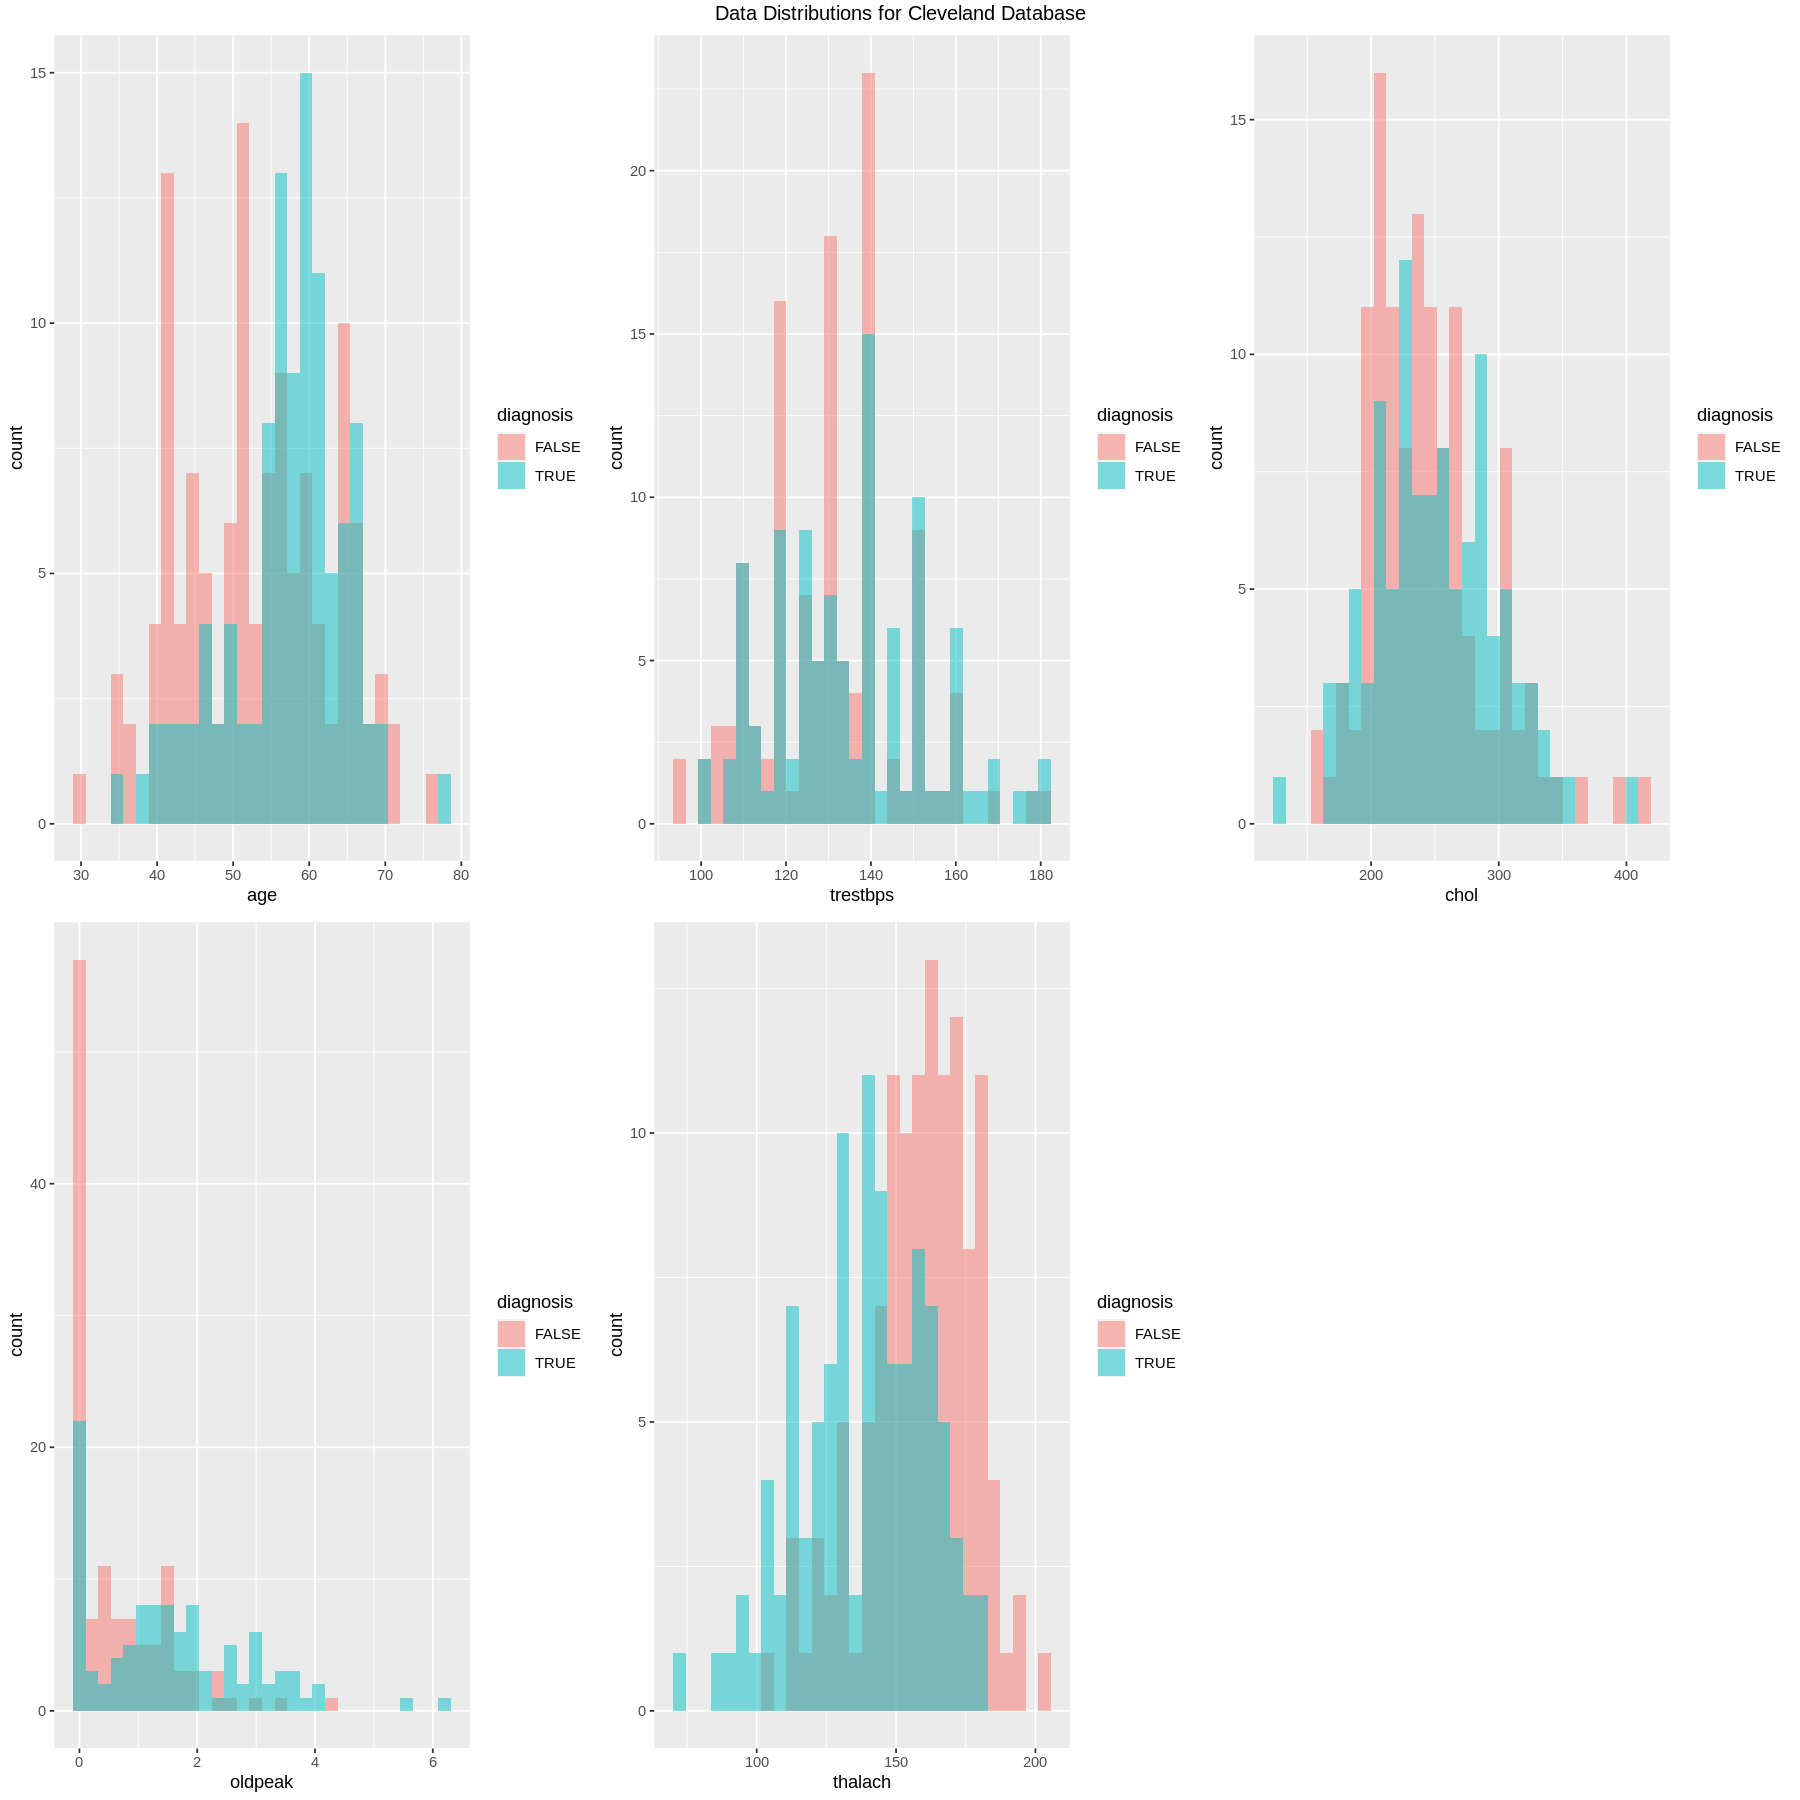

In [67]:
library(RColorBrewer)
library(gridExtra)

options(repr.plot.width=15, repr.plot.height=15)

cleveland_age <- ggplot(cleveland_training, aes(x = age, fill = as.factor(diagnosis))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'age',  fill = "diagnosis")
cleveland_trestbps <- ggplot(cleveland_training, aes(x = trestbps, fill = as.factor(diagnosis))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'trestbps',  fill = "diagnosis")
cleveland_chol <- ggplot(cleveland_training, aes(x = chol, fill = as.factor(diagnosis))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'chol',  fill = "diagnosis")
cleveland_oldpeak <- ggplot(cleveland_training, aes(x = oldpeak, fill = as.factor(diagnosis))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'oldpeak',  fill = "diagnosis")
cleveland_thalach <- ggplot(cleveland_training, aes(x = thalach, fill = as.factor(diagnosis))) +
    geom_histogram(alpha = 0.5, position = "identity") + 
    labs(x = 'thalach',  fill = "diagnosis")

grid.arrange(cleveland_age, cleveland_trestbps, cleveland_chol, cleveland_oldpeak, cleveland_thalach, nrow = 2, top = 'Data Distributions for Cleveland Database')

*figure 7*

We are using histograms to show the visualization between the count and the variable types. The histograms are also color-coded based on the diagnosis, with the red being that the patient does not have a heart disease diagnosis. Whereas the blue color represents patients who do not have heart disease. There are 5 graphs each for the 5 variables. 

By visualizing this data, the data that we calculated before which were the maximum, minimum, and mean values are seen to be much clearer. 
Presenting it in this format enables us not only to corroborate the insights gleaned from the initial summary but also to discern the impact of outliers on the displayed values. Furthermore, it provides a visualization of the dispersion of the classes. We can see that range of the data points is much clearer and also see if the` TRUE` diagnosis or` FALSE` diagnosis groups are grouped together, this would mean that the `TRUE` or `FALSE` diagnosis lean to one side morer.

It seems that `age` may not be the best predictor variable as the `FALSE` and `TRUE` diagnosis conditions are overlapping quite a bit. For our second variable which was `trestbps`, the `TRUE` diagnosis ranged from around 100-180, whereas the `FALSE` diagnosis ranged from 0-100. For our 3rd variable, which was `chol`, the 2 conditions of `FALSE` and `TRUE` overlapped each quite a bit, although many of the data points for the `FALSE` diagnosis were in the range of 200. The  `oldpeak` condition had a huge spike in the `FALSE` diagnosis at the value of 0. For the `thalach` condition, a large amount of the values (the majority were `TRUE` condition at around 160).  

#### Visualization using ggpairs() 

Another way to visualize the data in order to see the relationship between the predictors is through using `ggpairs()`. Considering we have a lot of variables, 5 in fact, it was not suitable to use a scatterplot. Therefore, using the `ggpairs()` and the `geom_histogram()` was preferable when it came to visualizing our data. 


Warning message in warn_if_args_exist(list(...)):
“Extra arguments: 'diagnosis' are being ignored.  If these are meant to be aesthetics, submit them using the 'mapping' variable within ggpairs with ggplot2::aes or ggplot2::aes_string.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


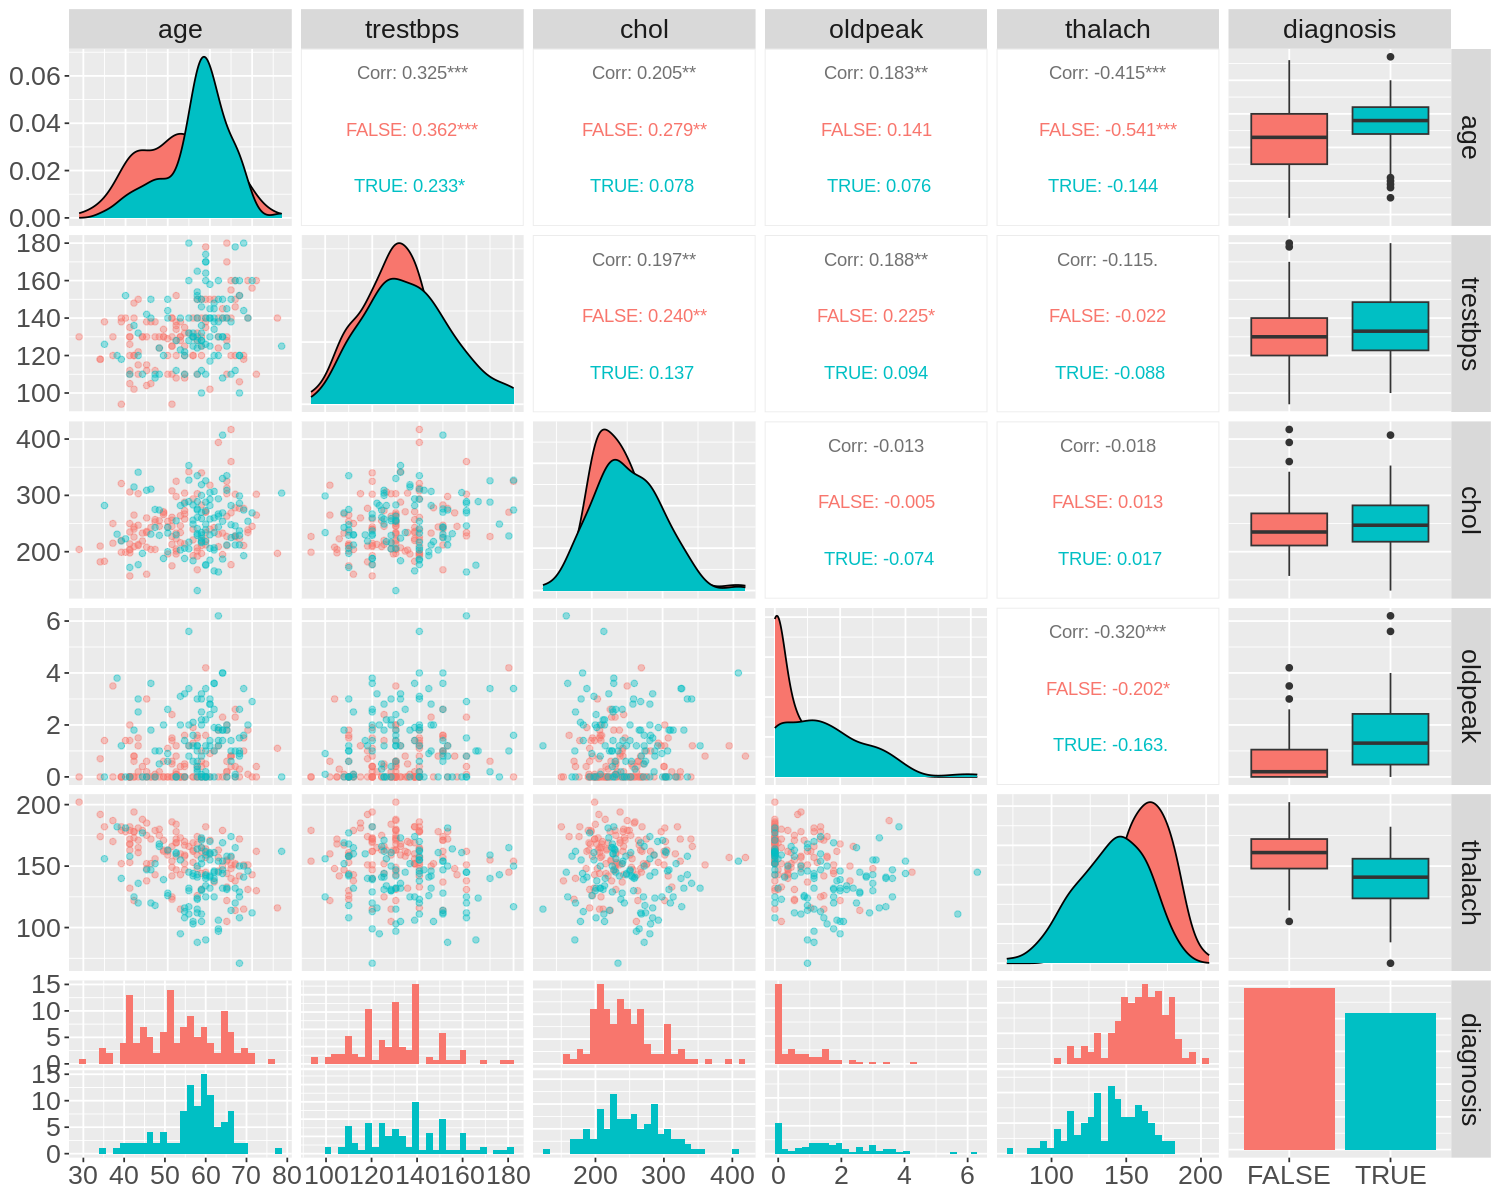

In [68]:
options(repr.plot.height = 10, repr.plot.width = 12.5)

#trying to plot relationship between predictors and class using ggplot
cleveland_select_training <- cleveland_training |>
    select(age, trestbps, chol, oldpeak, thalach, diagnosis) 

cleveland_pairplot <- cleveland_select_training |> 
     ggpairs(
         lower = list(continuous = wrap('points', alpha = 0.4)),
         diagnosis = list(continuous = "barDiag"),
         mapping=ggplot2::aes(colour = diagnosis)) +
   
     theme(text = element_text(size = 20))

cleveland_pairplot

*figure 8*

This visual representation illustrates a pattern where patients with heart disease (depicted in orange) generally exhibit lower maximum heart rates and higher cholesterol levels, while those without heart disease (depicted in teal) tend to have higher maximum heart rates and a broader range of cholesterol levels. Presenting the information in this manner not only serves to confirm the observations from the earlier summary but also allows us to discern the influence of outliers on the presented values. Additionally, it provides insights into the dispersion of the classes. Through this visualization approach, we can also observe the correlation between two variables. The data corroborates our findings when analyzing the maximum, minimum, and mean column.



### Finding the best $k$ value

#### Creating the model

To create our model, we need to follow the following steps:

1. Set the seed to 1, this is so our data is reproducible.
2. Create a recipe that uses `cleveland_training` to predict `diagnosis`, with `age`, `trestbps`, `chol`, `oldpeak`  and `thalach` as predictors.
3. Formulate a specification employing k-nearest neighbors, utilizing neighbors = `tune()` for cross-validation.
4. Partition the dataset into 10 folds, employing stratification based on the `diagnosis` variable.
5. Construct a workflow utilizing `tune_grid` in lieu of fit, thereby consolidating the initial two steps.
6. Iterate through each validation set, varying the values of $k$ within the range of 1 to 100.
7. Use `collect_metrics()` to collect the accuracy for each value of K and visually identify our best K-value with a line plot.

In [79]:
set.seed(1)

# Performing Standardization 
cleveland_recipe <- recipe(diagnosis ~ age + trestbps + oldpeak + chol + thalach  , data = cleveland_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

# K-nearest neighbour model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Perform 10 fold-cross validation
cleveland_vfold <- vfold_cv(cleveland_training, v = 10, strata = diagnosis)

#having a range of neighbor values from 1-100
gridvals <- tibble(neighbors = c(1:100))

# Create workflow
knn_results <- workflow() |>
      add_recipe(cleveland_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = cleveland_vfold, grid = gridvals) |>
# Collect metrics, filter for accuracy
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      select(neighbors, mean) |>
      arrange(desc(mean))

head(knn_results)

neighbors mean     
1 65        0.7508235
2 66        0.7508235
3 67        0.7504447
4 68        0.7504447
5 69        0.7373847
6 70        0.7373847

*figure 9*

The values $k$ = 65 and $k$ = 66 give us the highest accuracy of around 75% accuracy. 
To choose one, it's advisable to generate a line graph illustrating the relationship between accuracy and the parameter $k$.



#### Visualizing accuracy with K-Value Accuracies plot
By creating an accuracy plot we can better visualize the k-value accuracy points. We can see where there are big dips in accuracy and which portion of the graph has higher accuracies which is where we want to choose our k value point. Using `geom_line`, we can observe the comparative "safety" of each option, gauging the extent to which a variation in $k$ ± 1 influences accuracy. To accomplish this, it is necessary to create a graphical representation plotting accuracy against the number of neighbours.

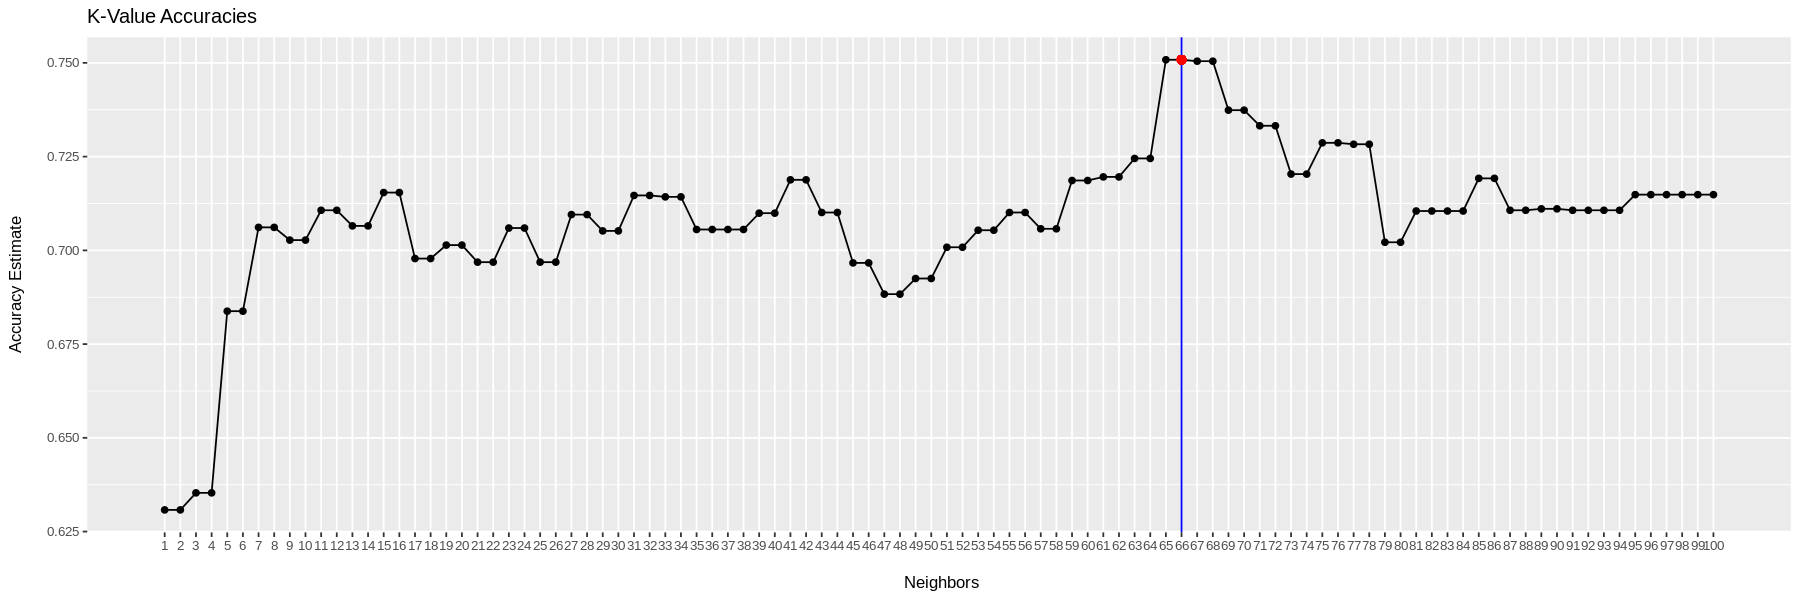

In [70]:
options(repr.plot.width = 15, repr.plot.height = 5)
#chose wider grid width in order to make the numbers along x-axis values clearly visible

accuracy_plot <- knn_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 66, colour = "blue") +
    geom_point(aes(x = 66, y = 0.7508235), size = 2, colour = "red") +
    labs(x = "\n Neighbors",
         y = "Accuracy Estimate\n",
         title = "K-Value Accuracies") +
    scale_x_continuous(limits = c(1, 100), breaks = seq(1, 100), minor_breaks = seq(1, 50, 1)) +
    theme(text = element_text(size = 10))

accuracy_plot

*figure 10*

By using a k-value accuracy plot we can avoid overfitting or underfitting, so we can trust our classifier, which is great! Looking at the graph above, the value between 65-68 give us pretty "safe" values of $k$, because the drops to either side of both points are quite similar. Although the drop on the right side is not as deep of a drop. We tried using 65, 66, and 67. They all produced similar accuracies, if not the same. Therefore we pick $k$ = 66, because it is near the middle of 65-68 and 65 and 66 are the k values with the highest accuracies.


#### Percentage of FALSE and TRUE condition in training data


Nonetheless, it is imperative to compare this accuracy with that of a majority classifier.

To achieve this, we will utilize `group_by` on the diagnosis variable and subsequently employ `summarize` to obtain the percentage representation of the predominant class.

In [71]:
#Comparing accuracy of classifier with majority classifier
cleveland_proportions <- cleveland_training |>
    group_by(diagnosis) |>
    summarize(n=n()) |>
    mutate(percent = n*100/nrow(cleveland_training))

cleveland_proportions

diagnosis n   percent 
1 FALSE     123 54.18502
2 TRUE      104 45.81498

*figure 11*

We can infer that a `FALSE` diagnosis constitutes the majority of the training data, encompassing 54.2% of all outcomes. Consequently, our classifier demonstrates accuracy superior to a majority classifier. Furthermore, the distribution of `FALSE` and `TRUE` conditions closely mirrors that of our entire dataset when we did not partition the data into training and testing sets.

#### Building the final model

Now that we have a value for $k$, we can create our final spec using `neighbors = 66`. We then fit it to `cleveland_training`.

In [72]:
set.seed(1)

final_spec <- nearest_neighbor(weight_func="rectangular", neighbors = 66) |>
    set_engine("kknn") |>
    set_mode("classification")

cleveland_fit <- workflow() |>
    add_recipe(cleveland_recipe) |>
    add_model(final_spec) |>
    fit(data = cleveland_training)

cleveland_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(66,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2687225
Best kernel: rectangular
Best k: 66

*figure 12*

This shows and outlines the steps that were taken to create the final model.

#### K-NN Classification

Subsequently, we retrained our classification model using the selected K-value, employed it to predict the `diagnosis` classes in the testing set `cleveland_testing`, and assessed the accuracy of our classifier.

In [73]:
#K-NN Classification
set.seed(1)

# predicting the results
cleveland_predictions <- predict(cleveland_fit, cleveland_testing) |> 
                       bind_cols(cleveland_testing)

# checking the accuracy
cleveland_metrics <- cleveland_predictions |> 
               metrics(truth = diagnosis, estimate = .pred_class) |> 
               select(.metric, .estimate) |> 
               head(1)

cleveland_metrics

.metric  .estimate
1 accuracy 0.6578947

*figure 13*

It can be seen that our prediction accuracy was around 65.8%. That is a bit on the lower side of what we would have wanted.


### Testing our classifier

#### Accuracy and confusion matrix

Now, we will finally use the testing set to look at how our classifier performs when given data it has never seen before.

To do this, we will predict using the same fit as before which we assigned to `cleveland_fit`, but this time with `cleveland_testing`. We need to look at its accuracy using `metrics` and its confusion matrix using `conf_mat`.

In [74]:
set.seed(1)

#building the confusion matrix, identifies the areas the model is weak at classifying
cleveland_conf_mat<- cleveland_predictions |>
    conf_mat(truth = diagnosis, estimate = .pred_class)
cleveland_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE    36   21
     TRUE      5   14

*figure 14*

Our classifier was around 66% accurate. It overdiagnosed the TRUE condition, most of its FALSE condition were predicted to be correct

#### Visualizing the Results
We created a bar plot representing the data in the confusion matrix. This way we could visualize and analyze our accuracy results more easily.

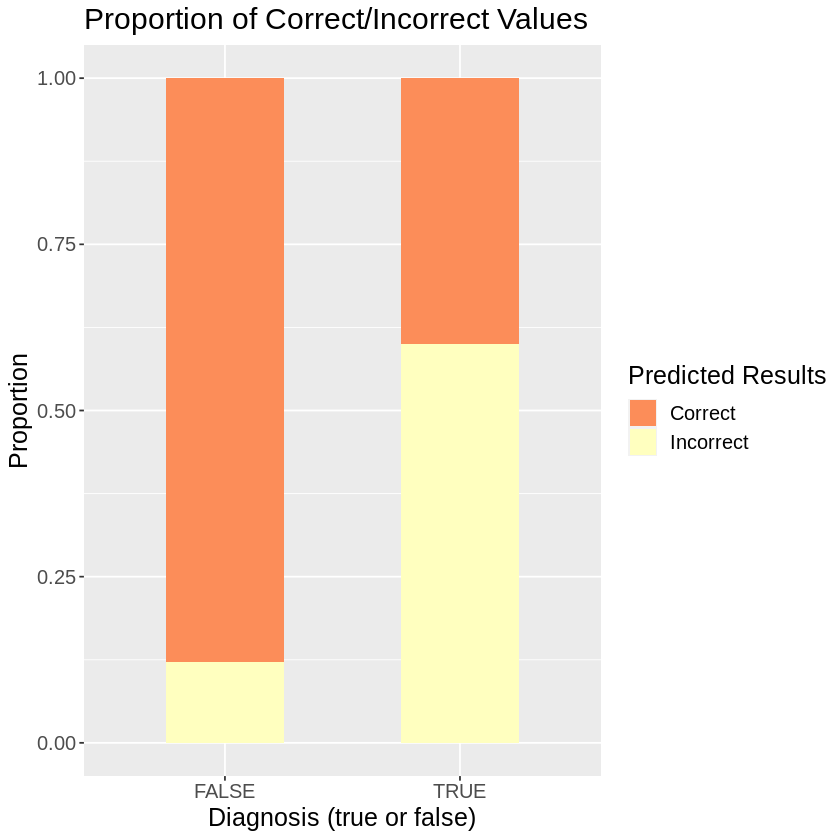

In [75]:
set.seed(1)

# creating a table to find out the proportion of correct/incorrect predictions
cleveland_confusion_table <- cleveland_conf_mat$table |>
                   as_tibble() |>
                   mutate(correct_prediction = case_when(
                           Prediction == Truth ~ "Correct",
                           TRUE ~ "Incorrect" ))

options(repr.plot.width = 7, repr.plot.height = 7)

# bar plot for the proportion of correct/incorrect predictions
cleveland_cfplot <- ggplot(cleveland_confusion_table, aes(x = Truth, y = n, fill = correct_prediction)) +
    geom_bar(stat = "identity", width = 0.5, position = "fill") +
    labs(x = "Diagnosis (true or false)", y = "Proportion",
         title = "Proportion of Correct/Incorrect Values", 
         fill = "Predicted Results") +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = "Spectral")

cleveland_cfplot

*figure 15*

Our classifier tends to be more prone to overdiagnosing than underdiagnosing, with a higher rate of errors when identifying individuals with heart disease compared to those without. While this may not be a critical concern if the classifier is intended to complement rather than replace a doctor's evaluation, it raises a potential issue. From a medical standpoint, leaning on the side of caution in diagnosis predictions is preferable. However, a drawback arises when patients, relying on the classifier, might not promptly seek treatment, assuming they don't have heart disease when, in reality, they do.

Accuracy in diagnosing the `FALSE` condition was notably higher, minimizing mistakes in identifying individuals without heart disease. This is beneficial, as it alleviates unnecessary concern for patients who are, indeed, free from heart disease. On the flip side, individuals predicted to have heart disease when they do not may experience unwarranted anxiety.

The introduction of the new column `diagnosis` instead of `num`  enhances the cautionary aspect of our classifier and its users within the medical field. By consolidating all potential heart disease diagnoses into one class (TRUE), the likelihood of misdiagnosis within the subset of patients with heart disease is reduced. This approach is valuable as it diminishes the potential for medical practitioners to exhibit bias towards a certain level of heart disease, addressing a prevalent issue in the medical field.

### Testing the versatility of our classifier

To test our classifier's accuracy when given data from another source, we will use another dataset from the publisher. This time we will use the VA Long Beach dataset as a secondary testing set. We decided to choose VA Long Beach as we wanted to see if our Cleveland classifier applied to those also in VA Long Beach since they are geographically both in the USA, we thought they could have similar variables that cause heart disease. 

In [76]:
va_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data",
                            col_names = FALSE)

va_clean <- va_data

colnames(va_clean) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
                           
# changing "?" into NA
va_clean[ va_clean == "?" ] <- NA

# adding diagnosis column, setting col types
# as.double is being used to keep decimal points 
#   when switching to factor to keep as accurate data points values as possible
va_clean <- va_clean |>
                    mutate(diagnosis = as.factor(ifelse(is.na(num), NA, (num > 0)))) |>
                     mutate(num = as_factor(num)) |>
                     mutate(age = as.double(age),
                           trestbps = as.double(trestbps),
                           oldpeak = as.double(oldpeak),
                           thalach = as.double(thalach), 
                           chol = as.double(chol)) |>
                    filter(age != "NA",
                           trestbps != "NA",
                           oldpeak != "NA",
                          chol != "NA",
                          thalach != "NA")
head(va_clean)
nrow(va_clean)


Rows: 200 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X8, X9, X10, X11, X12, X13
dbl (5): X1, X2, X3, X7, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age sex cp trestbps chol fbs restecg thalach exang oldpeak slope ca thal num
1 63  1   4  140      260  0   1       112     1      3.0    2     NA NA   2  
2 44  1   4  130      209  0   1       127     0      0.0    NA    NA NA   0  
3 60  1   4  132      218  0   1       140     1      1.5    3     NA NA   2  
4 55  1   4  142      228  0   1       149     1      2.5    1     NA NA   1  
5 66  1   3  110      213  1   2        99     1      1.3    2     NA NA   0  
6 66  1   3  120        0  0   1       120     0     -0.5    1     NA NA   0  
  diagnosis
1 TRUE     
2 FALSE    
3 TRUE     
4 TRUE     
5 FALSE    
6 FALSE

[1] 137

*figure 16*

Once again, we conducted data cleaning on the new dataset, employing the same procedures as the initial one. This involved converting '?' values to NA, ensuring proper assignment of our five variables to their respective column types, and introducing the `diagnosis` column. Subsequently, we filtered out any rows where our five predictor variables were equal to NA to facilitate the model fitting process. It's worth noting that this dataset is smaller than the previous one, containing only 137 rows, and exhibits a substantial number of NAs. However, the majority of the missing values do not pertain to our five predictor variables, alleviating some concern. Additionally, it's important to highlight that this dataset is not utilized for training purposes.

#### Applying our Cleveland classifier on the VA Long Beach dataset
To evaluate the adaptability of our classifier on the VA Long Beach dataset, we utilize the `predict` function to examine its accuracy when presented with the new data.

In [77]:
set.seed(1)

va_predictions <- predict(cleveland_fit, va_clean) |>
                      bind_cols(va_clean)

#find the accuracy of the predictions
va_metrics<- va_predictions |>
    metrics(truth = diagnosis, estimate = .pred_class) |>
    filter(.metric == "accuracy") 

va_metrics

#confusion matrix, identifies the areas the model is weak at classifying
va_conf_mat<- va_predictions |>
    conf_mat(truth = diagnosis, estimate = .pred_class)
va_conf_mat

.metric  .estimator .estimate
1 accuracy binary     0.6934307

          Truth
Prediction FALSE TRUE
     FALSE    18   30
     TRUE     12   77

*figure 17*

As evident from the results above, the accuracy of the classifier when applied to VA Long Beach data surpasses that of our Cleveland dataset, reaching approximately 69.3%, nearly 70%. This accuracy is a few percentage points higher than that achieved with our Cleveland data. This observation suggests that our classifier may find applicability to patients within the USA. The geographical proximity of VA Long Beach and Cleveland, both located in the USA, may contribute to the similarities in their data, possibly explaining the comparable accuracy percentages observed.

#### Visualizing Classfier on the VA dataset

We created a bar plot representing the VA Long Beach data in the confusion matrix.

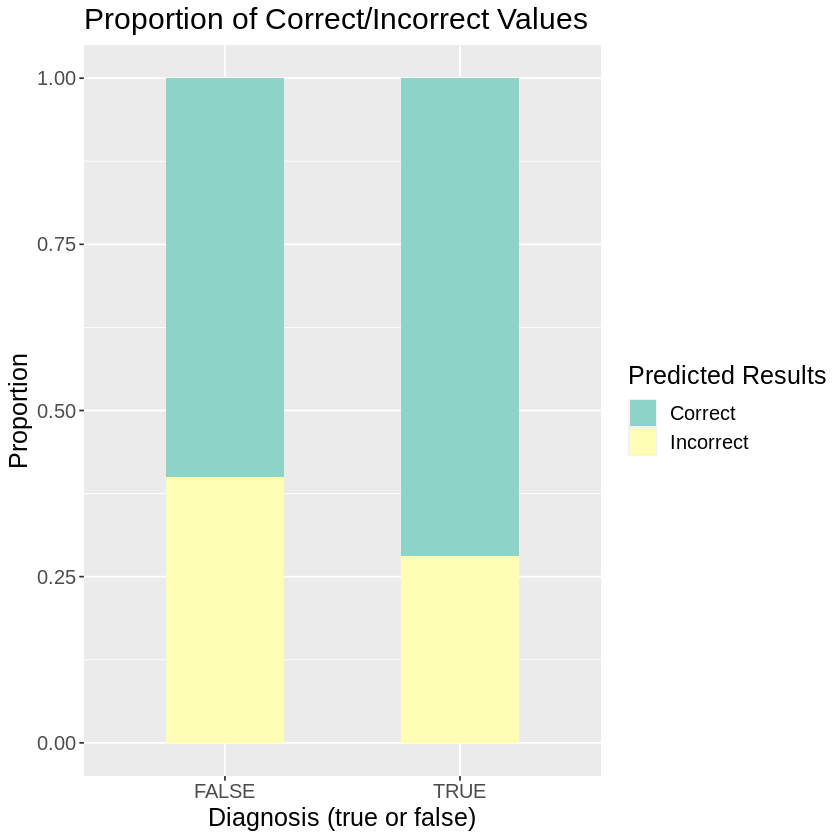

In [78]:
set.seed(1)

# creating a table to find out the proportion of correct/incorrect predictions
va_conf_table <- va_conf_mat$table |>
                   as_tibble() |>
                   mutate(correct_prediction = case_when(
                           Prediction == Truth ~ "Correct",
                           TRUE ~ "Incorrect"))

options(repr.plot.width = 7, repr.plot.height = 7)

# bar plot for the proportion of correct/incorrect predictions
va_conf_plot <- ggplot(va_conf_table, aes(x = Truth, y = n, fill = correct_prediction)) +
    geom_bar(stat = "identity", width = 0.5, position = "fill") +
    labs(x = "Diagnosis (true or false)", y = "Proportion",
         title = "Proportion of Correct/Incorrect Values", 
         fill = "Predicted Results") +
    theme(text = element_text(size = 15)) +
    scale_fill_brewer(palette = "Set3")


va_conf_plot

*figure 18*


In contrast to the Cleveland dataset, where our classifier consistently made accurate predictions for the FALSE diagnosis condition, the performance on the VA Long Beach dataset shows a different trend. Here, our classifier tends to make more incorrect predictions for the FALSE condition compared to the TRUE condition. The TRUE condition is predicted with slightly higher accuracy than the FALSE condition, albeit only by a small margin.

### Discussion
#### Answering the predictive question

Our aim was to address the query: **"Is the Cleveland population likely to have heart disease, based on the variables age, resting blood pressure (trestbps), cholesterol levels (chol), maximum heart rate (thalach) and ST depression induced by exercise relative to rest (oldpeak)?"** 


In pursuit of this answer, we developed a classifier, using and applying the skillsets that we have learned in lecture and the textbook, to diagnose heart disease based on cholesterol levels and the maximum heart rate achieved.

#### Methodology
We can measure the accuracy with which our model predicts a patient's chance of getting heart disease by using the k-nearest neighbour regression approach. The preliminary analysis found age and high cholesterol levels to be significant factors. Therefore, we can assume that patients with greater average age and greater average cholesterol would be predicted to have a likely chance of having heart disease.

#### Impact of Findings
Understanding heart disease and its related factors is super important for data science! Heart disease is a major problem that affects lots of people, and by studying it, data scientists can find clues to help prevent and treat it. Data scientists use numbers and information to learn about what causes heart disease, who is more at risk, and how we can make people healthier. By collecting data from hospitals, like in this case, we can determine the differences in health data in different American city hospitals.

By doing this, data scientists can help doctors and researchers make better decisions about how to keep our hearts healthy. We can understand more about what causes heart disease, such as that with an increase in the ST depression number, there is a higher chance of getting heart disease in the city of Long Beach, VA. By knowing this, people living in Long Beach, VA, will be more careful about their health habits to help reduce their risk of getting heart disease.

#### Findings

The accuracy of our model for the Cleveland data set was found to be around 65.8% for the k value of 66.


#### Was this expected?


Considering the research we did through the web, we initially believed that our selected variables would significantly impact the prediction of heart disease in patients. However, as we conducted data visualization, it became apparent that certain variables, such as age, did not exert as substantial an effect on the likelihood of a patient being diagnosed with heart disease. This observation aligned with our early visualization during the classifier's creation, indicating that some of our chosen variables might not be optimal predictors. Consequently, this impacted the accuracy of our model, resulting in a lower performance.

#### Reasons for Low accuracy in our Model
The classifier's accuracy, hovering around 66%, falls below the threshold for producing reliable results. A notable contributor to this lower accuracy is the imbalance in class quantity, with a higher percentage of FALSE conditions compared to the TRUE condition.

Several factors could explain the suboptimal performance of our classifier. Despite the original dataset being extensive, the need to filter out over three-quarters of the observations due to over-claimants significantly reduced the available data. Consequently, the resulting algorithm's accuracy is compromised due to the limited dataset, affecting both the training and testing sets for each K value.

The errors made by the classifier can be attributed to the dataset's insufficient size, resulting in less data for both training and assessing the accuracy of the classifier. Additionally, the chosen predictors exhibit a strong positive relationship with the diagnosis of heart disease. Opting for a balanced selection of positively and negatively related personality traits might have influenced the algorithm's behavior differently.

It is plausible that the selected predictors were not as robust as initially assumed, or they may not have been effective in predicting heart disease diagnoses. Despite comprehensive research supporting our initial conclusions, the dataset might not align with our findings.

Contrary to our expectations, our research consistently identified a notable relationship between all five predictors and heart disease. We anticipated a classification accuracy of at least 75% and expected to discern a clear trend among the selected predictors, enabling the classifier to reliably predict an individual's risk of heart disease. However, the dataset revealed that the predictors lacked a significant relationship with heart disease diagnoses, resulting in a notably weak classifier.

#### What future questions could this lead to?

<!-- - What is the average cholesterol level of a average middle aged person?
- What other factors other than cholesterol and heart rate impact the chance of a person getting heart disease?
- What is the mean level of blood pressure in a patient with heart disease?
- How can we make this classifier more versatile? (i.e. usable in more places) -->
1. Between Hungary and Switzerland, two countries in Europe, which countries’ patients have the greater likelihood of being diagnosed with heart disease?
2. What variables can be considered to prevent heart disease?
3. What variables most easily influence the chance of getting heart disease?
4. Which location of the four databases has the patients with the greatest chance of getting heart disease?

### Bibliography

This includes the links that we cited during the exploration of understanding our data, as well as our dataset. We used APA format when doing the citations. The intext citations seen throughout the report use APA format as well. The first citation (despite the references being in alphabetical order) is the dataset that we used.
 
##### References
Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1988). Heart Disease. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.

National Institute on Aging. (2023). Heart Health and Aging. U.S. Department of Health and Human Services. Retrieved from www.nia.nih.gov/health/heart-health/heart-health-and-aging

Mayo Clinic. (n.d.). Elevated Blood Pressure. Mayo Foundation for Medical Education and Research. Retrieved from www.mayoclinic.org/diseases-conditions/prehypertension/symptoms-causes/syc-20376703

Mayo Clinic. (2023). High Cholesterol. Mayo Foundation for Medical Education and Research. Retrieved from www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=With%20high%20cholesterol%2C%20you%20can,a%20heart%20attack%20or%20stroke

Lim, Yoke Ching, et al. (2016). ST-Segment Changes with Exercise Stress. Singapore Medical Journal. U.S. National Library of Medicine. Retrieved from www.ncbi.nlm.nih.gov/pmc/articles/PMC4958709

Saruta, T., & Palatini, P. (2005). Elevated Heart Rate: A Major Risk Factor for Cardiovascular Disease. Clinical and Experimental Hypertension (New York, N.Y. : 1993). U.S. National Library of Medicine. Retrieved from pubmed.ncbi.nlm.nih.gov/15702618/#:~:text=Mounting%20evidence%20shows%20that%20elevated,of%20cardiovascular%20morbidity%20and%20mortality